In [2]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Import the LHC data using pickle.
signal_low_file = open("Lab_5_Data/higgs_100000_pt_250_500.pkl", "rb")
signal_low_dict = pickle.load(signal_low_file)

background_low_file = open("Lab_5_Data/qcd_100000_pt_250_500.pkl", "rb")
background_low_dict = pickle.load(background_low_file)

signal_high_file = open("Lab_5_Data/higgs_100000_pt_1000_1200.pkl", "rb")
signal_high_dict = pickle.load(signal_high_file)

background_high_file = open("Lab_5_Data/qcd_100000_pt_1000_1200.pkl", "rb")
background_high_dict = pickle.load(background_high_file)

#Store all our data together for easy access.
# data = [[signal_low_file, background_low_file], [signal_high_file, background_high_file]]
columns = background_low_dict.keys()
print(columns)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


1.) Make two plots of Mass and d2 each with Signal and Background distributions. Describe the shape of the two distributions, commenting on the discrimination power of signal and background. Also make a 2D scatter plot between Mass and d2 for both signal and background.

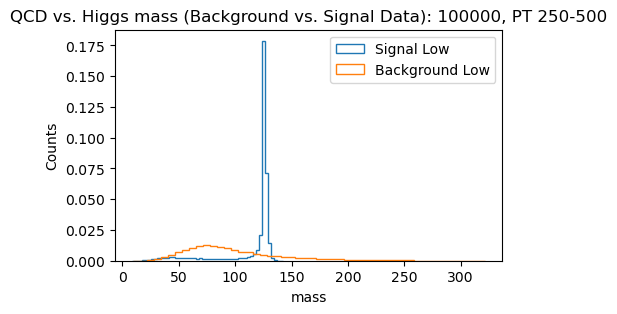

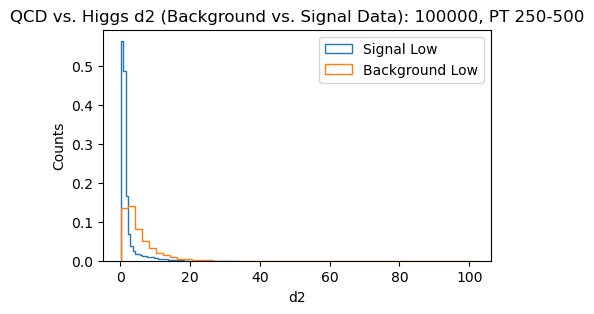

In [4]:
#Make some exploratory plots. Dictionary keys for the files are all the same, so we can just save them for one file, then loop over the
#remainder of the files in the same way we did for the first to more efficiently display everything without duplicating code.
for column in ['mass', 'd2']:
    cur_signal_data_low = signal_low_dict.get(column)
    cur_background_data_low = background_low_dict.get(column)

    #Background vs. signal for low pt.
    fig, ax = plt.subplots(1,1, figsize=(5,3))
    ax.hist(cur_signal_data_low, density=True, histtype="step", bins=50, label="Signal Low")
    ax.hist(cur_background_data_low, density=True, histtype="step", bins=50, label="Background Low")
    ax.set_title("QCD vs. Higgs " + column + " (Background vs. Signal Data): 100000, PT 250-500")
    ax.set_xlabel(column)
    ax.set_ylabel("Counts")
    ax.legend()

Text(0, 0.5, 'Counts')

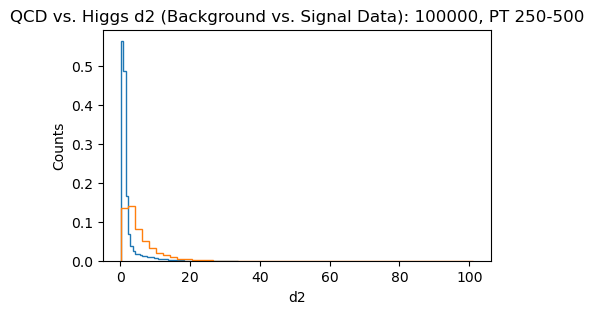

In [5]:
# TODO ^ (See above) Comment on the discrimination power of signal and background.
#Scatter plots

signal_mass_low = signal_low_dict.get("mass")
signal_d2_low = background_low_dict.get("d2")

background_mass_low = signal_low_dict.get("mass")
background_d2_low = background_low_dict.get("d2")

# TODO Scatter code below needs to be rewritten (accidentally deleted it)
#Background vs. signal for low pt.
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.hist(cur_signal_data_low, density=True, histtype="step", bins=50, label="Signal Low")
ax.hist(cur_background_data_low, density=True, histtype="step", bins=50, label="Background Low")
ax.set_title("QCD vs. Higgs " + column + " (Background vs. Signal Data): 100000, PT 250-500")
ax.set_xlabel(column)
ax.set_ylabel("Counts")

2.) Now assume a signal yield of 100 and a background yield of 20,000, re-weight the signal and background distribution such that they satisfy this yield. Then draw two histograms with the signal stacked on the background. Describe the visibility of observing the signal over the background.

In order to get a yield of 100, we multiply the weight values given in the example code accordingly.

AttributeError: 'list' object has no attribute 'shape'

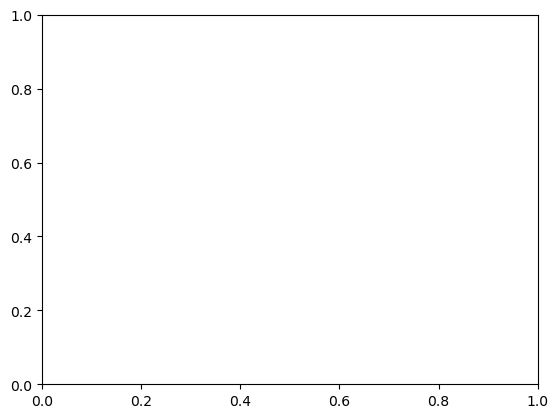

In [6]:
np.random.seed(42)
n_bins = 100
mass_d2 = [signal_mass_low, signal_d2_low]

fig, ax = plt.subplots(nrows=1, ncols=1)

custom_weight = 0.1
weighted_signal_mass_low_inbin, weighted_signal_mass_low_bins, _ = ax.hist(mass_d2, n_bins, density=False, histtype='bar', weights= custom_weight * np.ones(mass_d2.shape[0]))
ax.set_title('weighted histogram')
print(f"weighted: the yield is {np.sum(weighted_signal_mass_low_inbin)}, the area is {np.sum(weighted_signal_mass_low_inbin) * (weighted_signal_mass_low_bins[1] - weighted_signal_mass_low_bins[0]) }")

print(f"The shape of the Mass + d2 data is {mass_d2.shape}")

# Part 2 - HERA Data

In [7]:
from pyuvdata import UVData

In [8]:
# Read in the second Hera data set (what we were specified to use for this lab).
data = UVData()

# Just read in the second data set.
data.read("Lab_5_Data\zen.2459122.48015.mini.sum.uvh5")
hera_2 = data.data_array

###  1.

For some baseline pair, compute the amplitude of the difference in visibility between each pair of adjacent time slices (there should be 19 such pairs, in total).

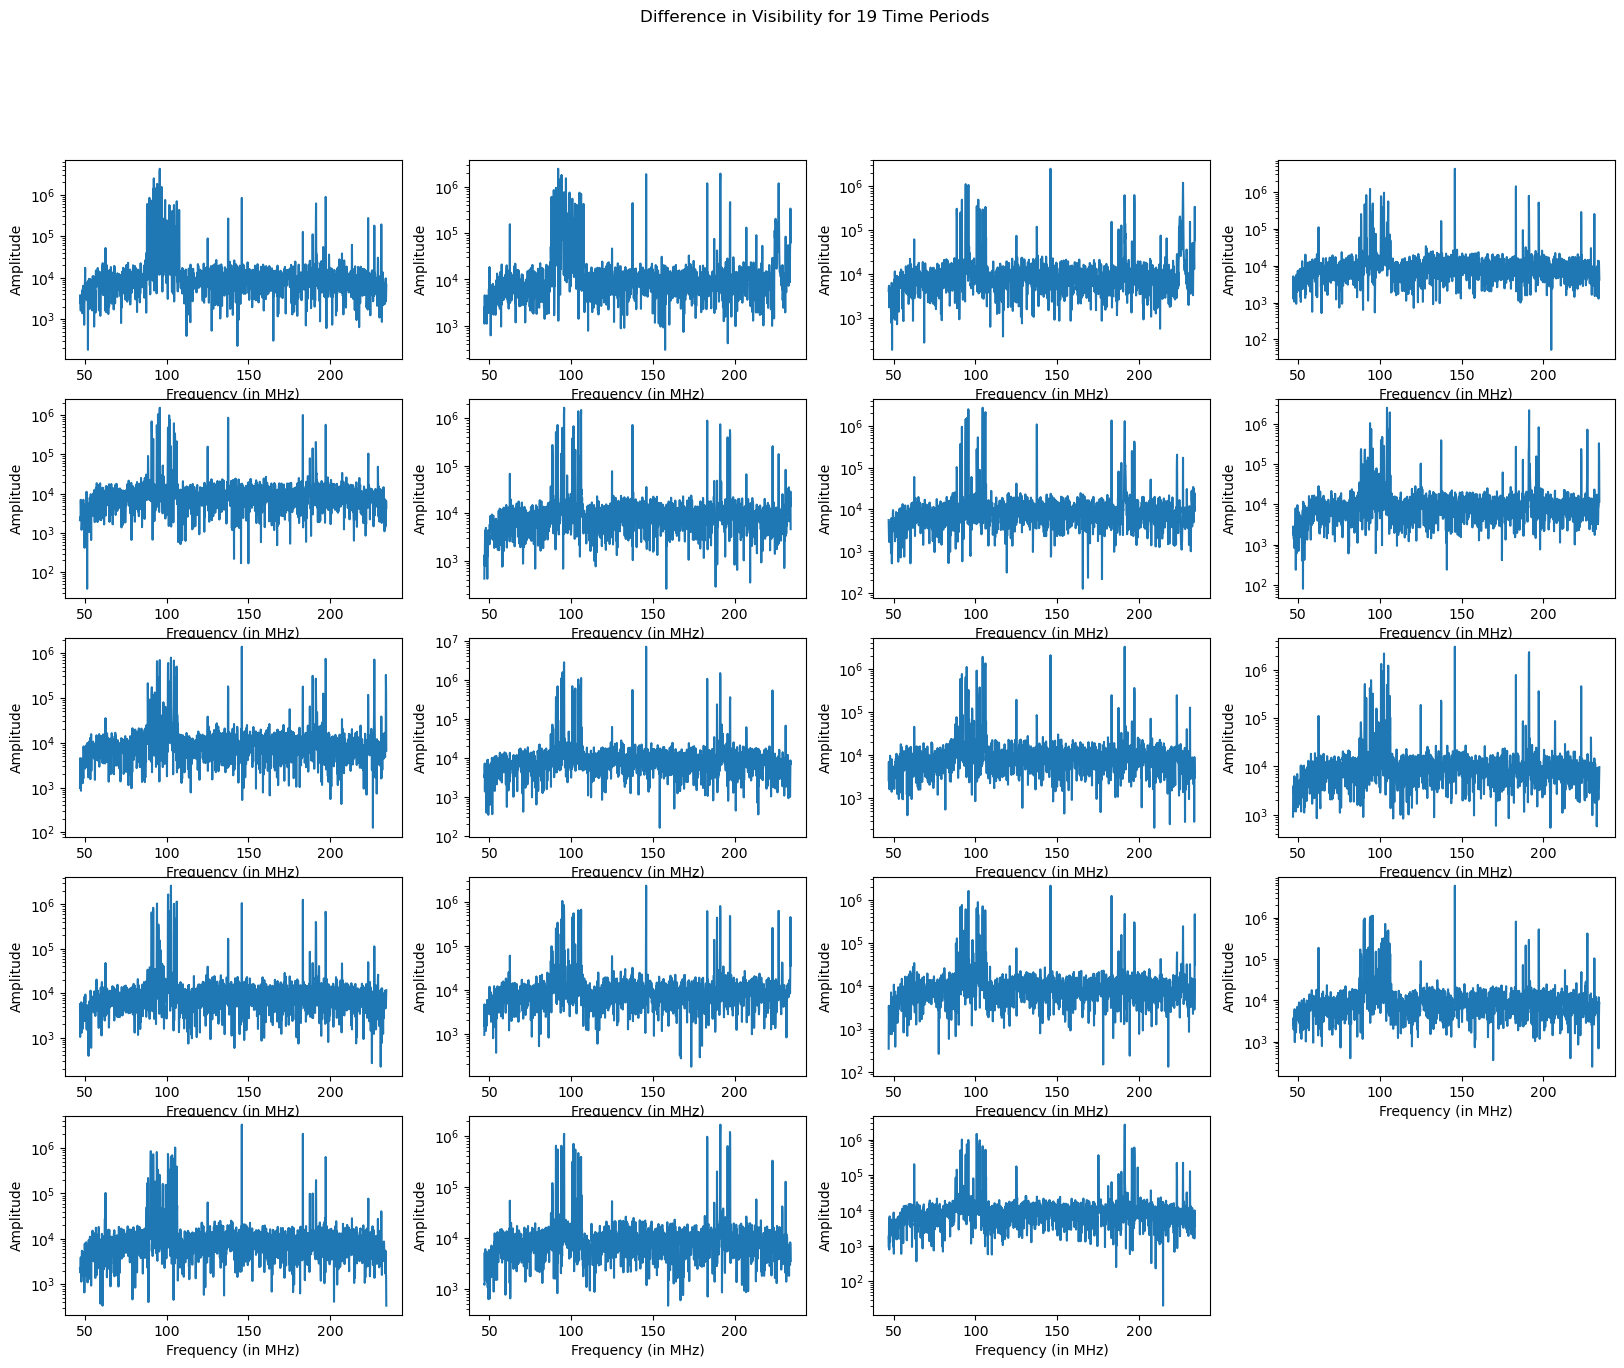

In [26]:
freqs = data.freq_array[0]*1e-6 # Gets frequencies associated with each channel, in MHz, so we need to convert to Hz.

# Store the number of frequencies we are analyzing (there are num_freqs values).
num_freqs = len(freqs)

# Choose the baseline corresponding to antennas 1 and 2.
dataPt = data.get_data(1,2)
timeDiff = np.zeros((19, num_freqs), dtype = np.complex_)

plt.figure(figsize=(20,15))
plt.suptitle('Difference in Visibility for 19 Time Periods')
for i in range(timeDiff.shape[0]):
    timeDiff[i] = dataPt[i+1]-dataPt[i]
    plt.subplot(5,4,i+1)
    plt.plot(freqs, np.abs(timeDiff[i]))
    plt.yscale('log')
    plt.xlabel('Frequency (in MHz)')
    plt.ylabel('Amplitude')

### 2.

Make some plots investigating this data and determine a reasonable amplitude threshold that will eliminate outliers. 

In [10]:
# Define a function to makes cuts on our data. Takes input data and percentage of peaks to be cut, then returns the cut value.
def cut(data, percent):
    # Define a function to determine amplitude threshold
    eject = 0
    threshold = np.max(data)*np.ones(data.shape[0])
    while(eject < percent):
        eject = 100*np.sum(data > threshold) / data.shape[0]
        threshold-=0.01*np.std(data)
    return threshold

In [27]:
#Find the thresholds respective to each of the 19 plots above.

cuts = np.zeros((19,num_freqs))
for i in range(19):
    cuts[i] = cut(np.abs(timeDiff[i]),5)


<Figure size 640x480 with 0 Axes>

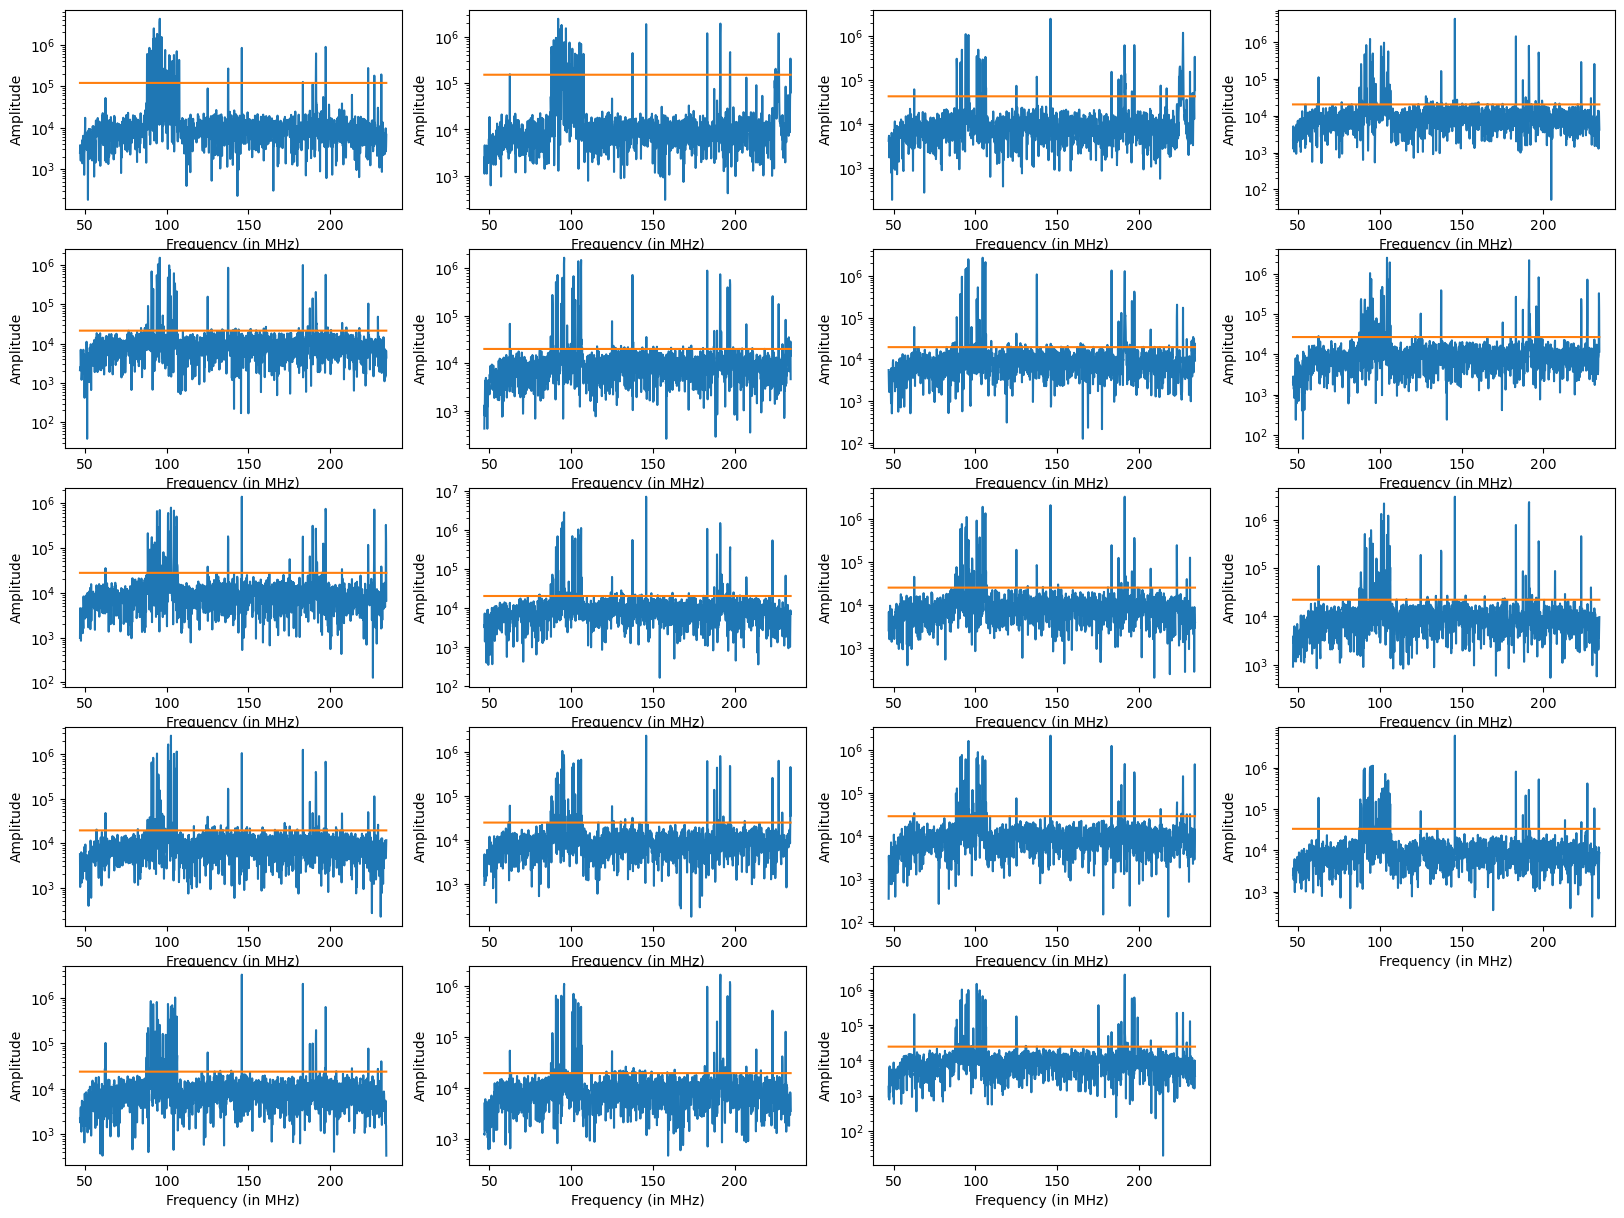

In [28]:
plt.suptitle('Unfiltered Signal for 19 Time Differences with cut line')
plt.figure(figsize=(20,15))

# Plot each of the cuts. Each one is represented by an orange line representing the threshold above which we keep data.
for i in range(19):
    plt.subplot(5,4,i+1)
    plt.plot(freqs, np.abs(timeDiff[i]))
    plt.plot(freqs, cuts[i])
    plt.yscale('log')
    plt.xlabel('Frequency (in MHz)')
    plt.ylabel('Amplitude')

### 3.

Apply this threshold to each pair of adjacent time slices to get a list of all frequencies that you will remove. To be conservative, if the amplitude for some frequency is above your threshold in any of the pairs, then that frequency should be removed. 

In [25]:
# Seems like ~5% is a good threshold above which to cut on the amplitude of our signal. Create a mask to filter out these values accordingly.
mask = np.abs(timeDiff)>cuts 

## Joining the several masks at different times in two different ways

unionMask = np.sum(mask, axis = 0)
for i in range(num_freqs):
    if unionMask[i]>0:
        unionMask[i]= 1

        
interMask = np.sum(mask, axis = 0)
for i in range(num_freqs):
    if interMask[i]>18:
        interMask[i]= 1
    else:
        interMask[i]=0

### 4. 

Make plots of your data (e.g., waterfall plots) before/after filtering to convince yourself that you have removed frequencies that exhibit large variation over time.

Text(0.5, 0, 'Frequency')

<Figure size 640x480 with 0 Axes>

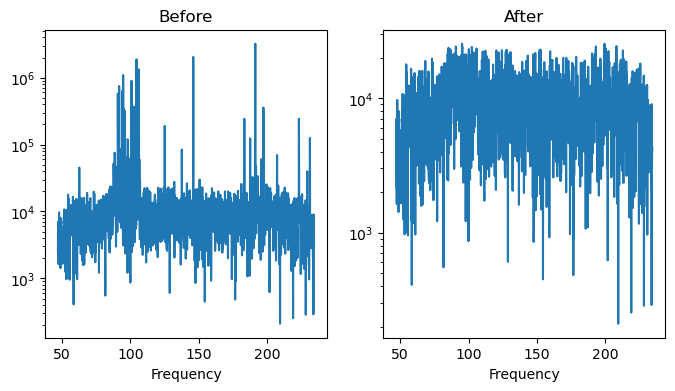

In [38]:
# Now apply the mask. Compare a time slice before and after the cut implementation to check ourselves.
plt.suptitle('Time Slice t10-t9 before vs after cut')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(freqs, np.abs(timeDiff[10]))
plt.title('Before')
plt.yscale('log')
plt.xlabel('Frequency')
plt.subplot(1,2,2)
plt.title('After')
plt.plot(freqs[~(mask[10])], np.abs(timeDiff[10][~(mask[10])]))
plt.yscale('log')
plt.xlabel('Frequency')

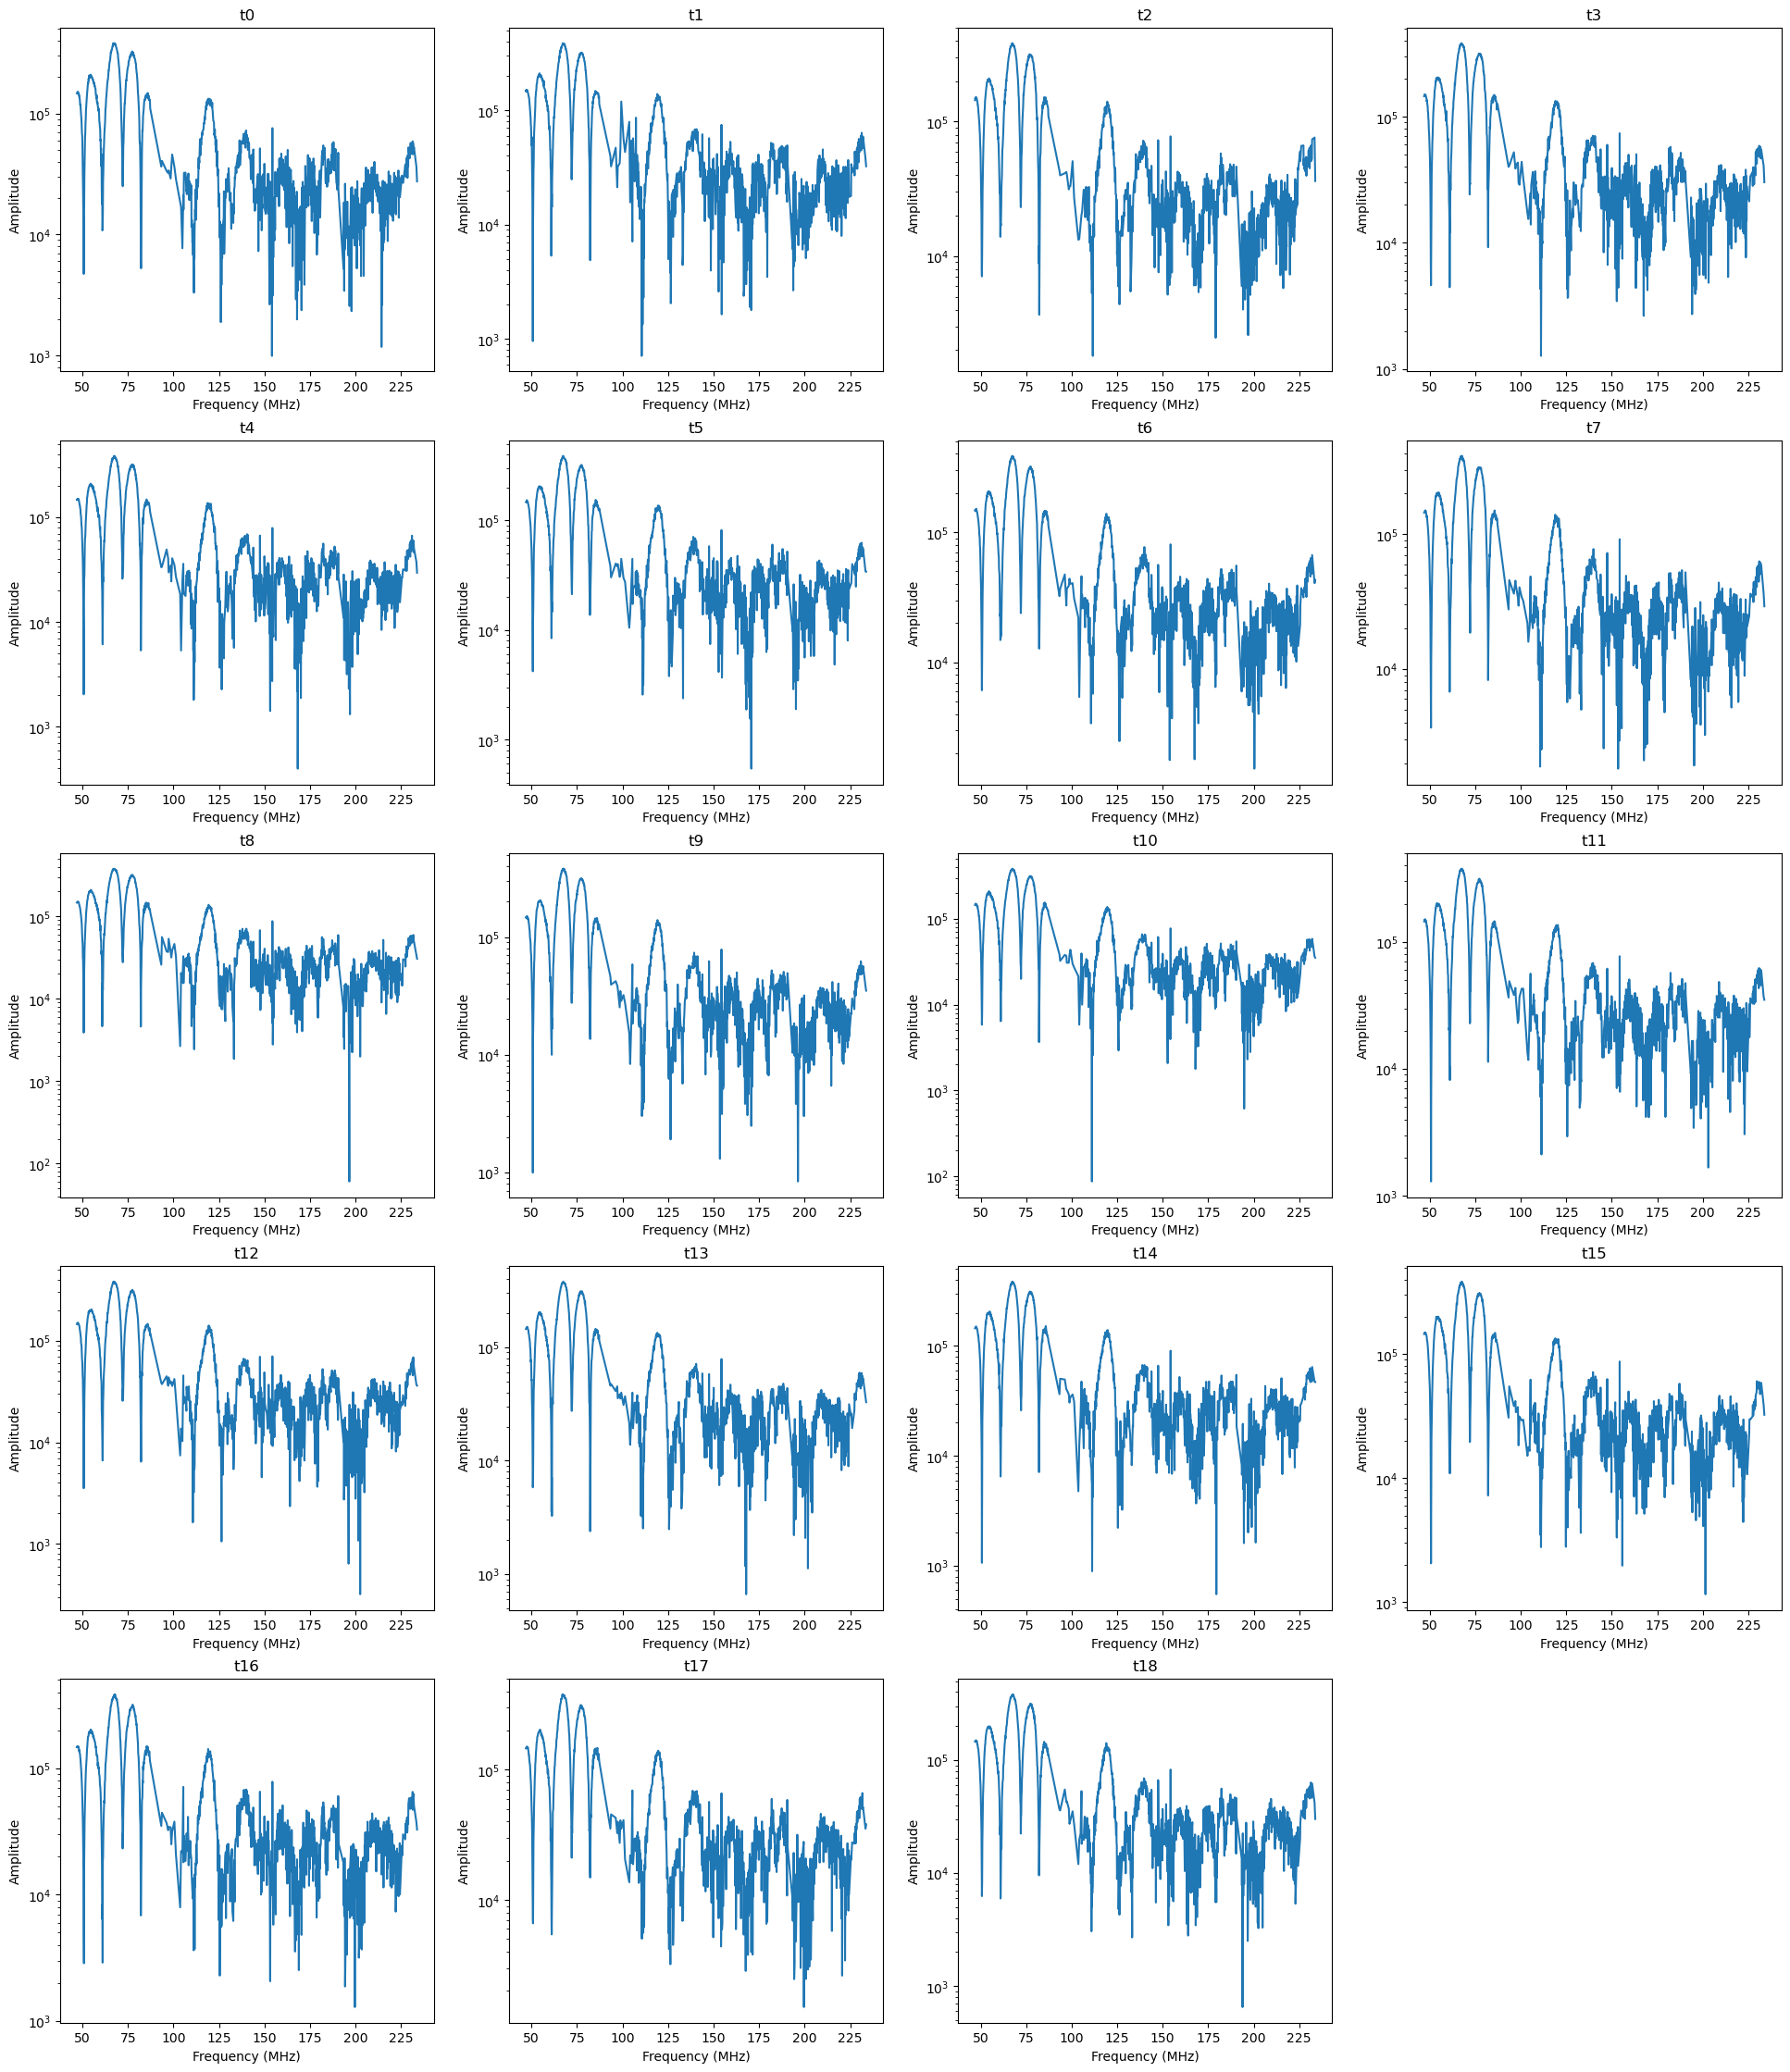

In [44]:
plt.figure(figsize=(24,28))
for i in range(19):
    plt.subplot(5,4,i+1)
    plt.plot(freqs[unionMask==0], np.abs(dataPt[i,unionMask==0]))
    plt.yscale('log')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Amplitude')
    plt.title(f't{i}')

In [36]:
# Looks like cut is successful—not nearly as many outliers are present.


5. 

TODO